# __Community detection algorithms__
## __Optimization based methods: modularity maximization__
Modularity maximization methods are a prominent class of algorithms in community detection that aim to discover partitions of a network by optimizing a specific quality function called modularity.
<div style="background-color: #e6ffe6; padding: 0px; border-radius: 5px;">
    
_Note:_ You can find a more detailed explanation of **modularity** [here](./modularityZ.ipynb).

</div>


### __community_multilevel (The Louvain Method)__

#### When is community_multilevel applied?

This algorithm is usually applied when:

- _To identify communities at different levels of granularity:_ Many real-world networks exhibit a hierarchical organization, where smaller, tightly knit groups are nested within larger, broader communities (e.g., departments within a company, friends within a social circle, or pathways within a biological system). Multilevel algorithms can reveal these nested structures.

- _Dealing with large-scale networks:_ It is computationally efficient and scalable, making it suitable for analyzing networks with millions of nodes and edges, where other community detection methods might become prohibitively slow.


### __community_leiden__

The Leiden algorithm is a community detection algorithm that builds upon the foundations of the Louvain method but addresses some of its crucial shortcomings, particularly the issue of disconnected or weakly connected communities.

#### When is community_leiden applied?

The Leiden algorithm is applied in similar scenarios to Louvain, but it is often preferred when:

- _Guaranteed connected communities are crucial:_ If it's essential that the identified communities are internally connected graphs (meaning all nodes within a community can reach each other through paths within that community), Leiden is the algorithm of choice.

- _Higher quality partitions are desired:_ Research has shown that Leiden generally produces partitions with higher modularity values and is more stable in its results compared to Louvain ([Traag, Waltman, & van Eck, 2019](https://doi.org/10.1038/s41598-019-41695-z)).

- _Analyzing large and complex networks:_ Like Louvain, Leiden is designed for scalability and efficiency on large networks.

- _Addressing the "resolution limit" (to some extent):_ While both Louvain and Leiden optimize modularity, and __modularity__, known to suffer from the _resolution limit_ — the tendency to favor larger communities at the expense of smaller, yet structurally significant ones. Leiden's refinement step can help mitigate this by ensuring that smaller, truly cohesive sub-communities are not artificially merged into larger, weakly connected ones. The Leiden algorithm's implementation also allow for a _resolution_parameter_ (often denoted as γ) to explicitly control the granularity of the communities detected.

    - γ > 1: Leads to more, smaller, and well-connected communities.

    - 0 < γ < 1: Leads to fewer, larger, and potentially less well-connected communities.
 

### __community_fastgreedy__

#### When is community_fastgreedy applied?

Fast-Greedy is typically applied when:

- _One needs a quick initial pass at community detection:_ It's known for its relatively fast performance, especially on sparse graphs. This makes it a good "first try" algorithm when exploring a network's community structure, particularly for larger graphs where more computationally intensive methods might be too slow.

- _Modularity maximization is the primary goal:_ The algorithm is explicitly designed to optimize the modularity score, aiming to find partitions where connections are dense within communities and sparse between them.

- _Hierarchical insights are valuable:_ As an agglomerative method, it constructs a dendrogram (a hierarchical tree of merges). In `igraph`, this function directly returns a `VertexDendrogram` object, which can be used to visualize community formation. From this dendrogram, the partition with the highest modularity found throughout the merging process can be easily extracted (e.g., using the `.as_clustering()` method), or other levels of granularity can be explored."

- _Baseline comparison:_ Due to its historical significance and speed, it's often used as a baseline algorithm to compare the performance and results of newer, more complex community detection methods.
 

## __Hierarchical clustering__
Hierarchical clustering methods are a class of algorithms that build a hierarchy of partitions, either by merging smaller communities into larger ones or by subdividing a large network into smaller ones. The result of these methods is typically a **dendrogram**, which visually represents the nested community structure.

These methods don't require you to pre-specify the number of communities. Instead, you choose the final partition by cutting the dendrogram at a particular level, which defines the number and size of the resulting communities.
<div style="background-color: #e6ffe6; padding: 0px; border-radius: 5px;">
    
_Note:_ You can find a more detailed explanation of **hierarchical clustering** [here](./hierarchical_clustering.ipynb).

</div>


### __community_edge_betweenness (The Girvan-Newman Algorithm)__

#### When is community_edge_betweenness applied?

The Edge Betweenness (Girvan-Newman) algorithm is typically applied when:

- _Identifying "bridge" edges is key:_ The fundamental idea behind edge betweenness for community detection is that edges connecting different communities will have a high betweenness centrality because many shortest paths between nodes in separate communities must pass through them. Therefore, it's used when the goal is to pinpoint and remove these inter-community "bottleneck" connections to reveal the underlying groups.

- _For a divisive approach to community detection:_ Unlike algorithms that build communities up (agglomerative), community_edge_betweenness employs a "top-down" or "divisive" strategy. It iteratively removes the most central "bridge" edges, causing the network to naturally break apart into its constituent communities. This is useful when you want to understand how communities are _separated_ rather than how they are _formed_.

- _To understand hierarchical community structure:_ A significant strength of this method is that it intrinsically generates a hierarchical decomposition of the network. As edges are progressively removed, you can observe the community structure at different levels of granularity – from a few large communities to many smaller ones. This makes it ideal for analyses where understanding the nested relationships between groups is important, often visualized as a dendrogram.

- _For moderate-sized networks (or when computational resources allow for larger ones):_ A key consideration is the computational cost. Calculating and recalculating edge betweenness after each edge removal can be computationally intensive, especially for very large networks (it has a high time complexity, often cited as O(MN2) or O(N3) in dense graphs, where N is the number of nodes and M is the number of edges). Therefore, it's often more practical for small to medium-sized networks, or when approximate versions are available or high-performance computing resources can be leveraged.

## __Other methods__


### __community_voronoi__

#### When is community_voronoi applied?

The Community Voronoi Algorithm is typically applied when:

- _Dense networks:_  Voronoi method remains tractable and effective, particularly when edge weights play a more crucial role in defining the optimal community structure of the network than the topology itself.

- _Consistency and robustness are key:_ Many community detection algorithms are stochastic and may produce different outputs for the same input. Community Voronoi, when initialized with fixed seed, provides consistent and reproducible results.

- _Attribute handling (strength or length):_ The algorithm can easily handle attributes such as strength or length.


### __community_infomap__

#### When is community_infomap applied?

The Infomap algorithm is typically applied when:

- _Information flow and dynamics are central:_ Infomap excels in networks where the concept of a "random walker" or the flow of information/traffic is meaningful, and the goal is to find modules that act as flow traps.

- _Large and complex networks:_ It is highly efficient and scalable, making it suitable for analyzing very large graphs with millions of nodes and edges, where other methods might be computationally prohibitive.

- _Hierarchical community structure:_ It can effectively uncover nested communities (communities within communities), providing insights into multi-level organization.

- _Robustness and near-determinism are valued:_ While not strictly deterministic in all implementations due to minor tie-breaking nuances, Infomap generally produces highly consistent and reproducible results for a given weighted input.


### __community_fluid_communities__

#### When is community_fluid_communities applied?

The Fluid communities algorithm is typically applied when:

- _Looking for communities based on "flow" and "attraction" in a dynamic sense:_ The algorithm models communities as fluids that flow through the network, expanding or contracting based on the influence of their neighbors. This is particularly useful when the concept of nodes "attracting" or "pulling" others into their community makes intuitive sense for the network.

- _The number of communities (k) is known or can be estimated beforehand:_ Unlike many other algorithms that discover the number of communities, Fluid Communities requires specifying the number of communities (k) to find. This makes it suitable when there is prior knowledge or a hypothesis about the expected number of distinct groups.

- _Overlapping communities are not desired:_ Fluid Communities typically produces a partition where each node belongs to exactly one community, making it a good choice for scenarios where distinct, non-overlapping groups are preferred.

- _Computational efficiency for large graphs is a priority:_ The algorithm is generally quite efficient and scalable, making it a viable option for large networks where other methods might be too slow. It converges relatively quickly.


### __community_label_propagation__

#### When is community_label_propagation applied?

The Label Propagation Algorithm (LPA) is typically applied when:

- _Analyzing very large networks:_ LPA is highly valued for its exceptional computational efficiency, often achieving near-linear time complexity (O(M) or O(N) for sparse graphs, where M is edges and N is nodes). This makes it one of the most practical algorithms for community detection in massive graphs (e.g., social networks with millions of users, large web graphs, extensive biological networks) where more complex or iterative algorithms (like Girvan-Newman) become prohibitively slow.

- _When a fast, initial community partition is needed:_ Due to its speed, LPA is often used to get a quick first look at the community structure of a network. It can serve as a rapid baseline for comparison with other algorithms or as a preliminary step in a more complex analysis pipeline.

- _When simplicity and interpretability of the core mechanism are valued:_ The underlying principle of labels propagating and consolidating within dense regions is intuitive. For applications where a straightforward, graph-driven clustering method is preferred over complex optimization functions, LPA is a strong candidate.

- _When non-overlapping communities are acceptable (or required):_ The basic LPA assigns each node to exactly one community. If your domain or problem requires distinct, mutually exclusive groups, LPA naturally provides this. (_Note:_ Variants exist for overlapping communities, but the standard LPA does not produce them.)



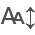

In [1]:
%run -i functions.ipynb
show_table()